# Leaf Iris Species Detection

## Decision Tree

**In this project we are going to use Decision Tree Algorithm to detect the species of the leaves by its shape and various other parameters.**

- Iris is a genus of 360-400 species of flowering plants.

**Algorithm**

1. Definition
- It is a tree structured classifier that continuously splits the data according to the certain parameter.
- Is the graphical representation to get all the possible solutions to a problem that is decision based on a given conditions.
- It uses classification and regression tree method.
2. Main Elements
- Nodes ---> represents the features
- Branches ---> represents decision nodes
- Leaf Node ---> represents result or outcomes
3. Terminology
   1. Root Node: It is the start of the decision tree where there is a complete dataset.
   2. Leaf Node: It is the final output node.
   3. Splitting: It is the process of dividing the root node.
   4. Branch: The tree formed by the splitting of tree.
   5. Pruning: It is the process of removing the unwanted branches.
   6. Child Node: It is the node other than the parent node.
4. Tuning Parameter
   1. Attribute Selection Measure(ASM)
      1. Information Gain
         - Measure reduction in entropy
         - Decides which attribute should be selected as a decision node.
      2. Gini Index
         - It is the measure of impurity or purity used while creating a decsion tree.
         - Attribute with low Gini index should be preferred over the high Gini index.
      3. Chi Square
      4. reduction in Variance
   2. Max_depth
      - The maximum depth of the tree. If none, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples.
      - Using range of max_depth value with accuracy graph, we can obtain which max_depth value is performing well.
5. Building a Decision Tree
   1. Complute the entropy of the Dataset
   2. Which node to select as a root node.
      - Calculating the entropy and verifying the maximum Entropy Gain for which feature, that will be the Root Node. And the same process to form a tree structure.

**Entropy**
- Definition: Metric used to measure the impurity
- Formula: -(p(yes)xlog(P(yes))+p(no)xlog(P(no)))
- If number of YES = number of NO, then Entropy = 1
- If it has all YES or all NO, then Entropy = 0 

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
from sklearn.datasets import load_iris

In [2]:
# Load the dataset
dataset = load_iris()

In [3]:
print(dataset.data)
print(dataset.target)
print(dataset.data.shape)

[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.9 3.1 4.

In [4]:
# Segregating the data into independent and dependent variables
x = pd.DataFrame(dataset.data, columns = dataset.feature_names)

In [5]:
x

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [6]:
y = dataset.target

In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [8]:
# Split the data for training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [9]:
# Shape of the train and test sets
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(112, 4)
(38, 4)
(112,)
(38,)


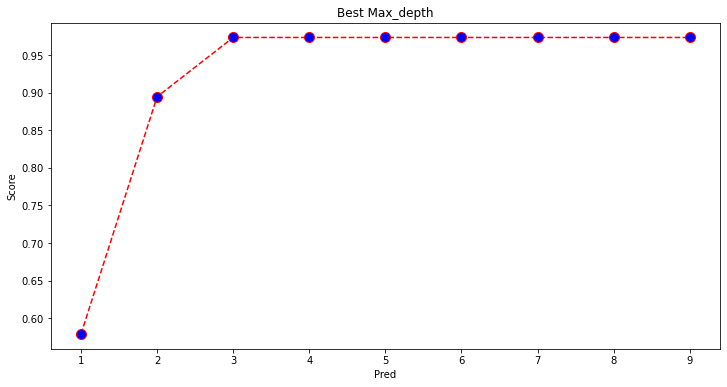

In [10]:
# Finding the best max_depth value
accuracy = []
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

for i in range(1,10):
    model = DecisionTreeClassifier(max_depth = i)
    model.fit(x_train,y_train)
    y_pred = model.predict(x_test)
    score = accuracy_score(y_test,y_pred)
    accuracy.append(score)
plt.figure(figsize=(12,6)) # to set the size of the graph
plt.plot(range(1,10),accuracy,color="red",linestyle="dashed",marker="o", markerfacecolor="blue",markersize=10)
plt.title("Best Max_depth")
plt.xlabel("Pred")
plt.ylabel("Score")
plt.show()

In [11]:
# Train the algorithm
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(criterion = "entropy", max_depth = 3, random_state=0)
model.fit(x_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [12]:
# Predicting all the x_test values
y_pred2 = model.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1),y_test.reshape(len(y_test),1)),1))

[[2 2]
 [1 1]
 [0 0]
 [2 2]
 [0 0]
 [2 2]
 [0 0]
 [1 1]
 [1 1]
 [1 1]
 [2 2]
 [1 1]
 [1 1]
 [1 1]
 [1 1]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [0 0]
 [2 2]
 [0 0]
 [0 0]
 [1 1]
 [1 1]
 [0 0]
 [2 2]
 [1 1]
 [0 0]
 [2 2]
 [2 2]
 [1 1]
 [0 0]
 [2 1]]


In [13]:
# Finding the accuracy score
from sklearn.metrics import accuracy_score
print("Accuracy of the model: {}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model: 97.36842105263158%
